In [ ]:
# Importing additional libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enabling inline plotting for Jupyter Notebooks
%matplotlib inline
!pip install keras_preprocessing
# Importing necessary libraries from Keras
from keras.utils import to_categorical
from keras.models import model_from_json
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00


## Data Preprocessing

In [ ]:
#Define directories for training and testing images
TRAIN_DIR = '/content/drive/MyDrive/Colab Notebooks/Emotion-detection/images/train'
TEST_DIR = '/content/drive/MyDrive/Colab Notebooks/Emotion-detection/images/test'

In [ ]:
def createdataframe(dir):
    # Initializing lists to store image paths and labels
    image_paths = []
    labels = []

    # Iterating through each label directory
    for label in os.listdir(dir):
        # Iterating through each image in the label directory
        for imagename in os.listdir(os.path.join(dir,label)):
            # Appending the image path and corresponding label
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        # Printing progress for each label
        print(label, "completed")

    # Returning the lists of image paths and labels
    return image_paths, labels

In [ ]:
# Creating an empty DataFrame
train = pd.DataFrame()

# Filing the DataFrame with image paths and labels using the createdataframe function
train['image'], train['label'] = createdataframe(TRAIN_DIR)


disgust completed
fear completed
angry completed
neutral completed
sad completed
happy completed
surprise completed


In [ ]:
# Creating an empty DataFrame
test = pd.DataFrame()
# Filing the DataFrame with image paths and labels using the createdataframe function
test['image'], test['label'] = createdataframe(TEST_DIR)

surprise completed
fear completed
neutral completed
sad completed
disgust completed
happy completed
angry completed


In [ ]:
# Importing the tqdm library's notebook version
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    # Initializing an empty list to store features
    features = []
    # Looping through each image filename in the list, displaying a progress bar
    for image in tqdm(images):
        # Loading the image in grayscale
        img = load_img(image, color_mode="grayscale")
        # Converting the image to a numpy array
        img = np.array(img)
        # Appending the image array to the features list
        features.append(img)

    # Converting the list of image arrays to a numpy array
    features = np.array(features)
    # Reshapeing the array to have dimensions (number of images, height, width, channels)
    features = features.reshape(len(features), 48, 48, 1)
    # Returning the extracted features
    return features


In [ ]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28710 [00:00<?, ?it/s]

In [ ]:
# Divide the pixel values of the training features by 255.0 to scale them between 0 and 1
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initializing a LabelEncoder object
le = LabelEncoder()
# Fit the LabelEncodeing to the labels in the 'label' column of the 'train' dataframe
le.fit(train['label'])

LabelEncoder()

In [ ]:
# Transforming the categorical labels in the 'label' column of the training data using the fitted LabelEncoder
y_train = le.transform(train['label'])
# Transforming the categorical labels in the 'label' column of the test data using the fitted LabelEncoder
y_test = le.transform(test['label'])


In [ ]:
# Converting the numerical labels for training data into one-hot encoded vectors with 7 classes
y_train = to_categorical(y_train, num_classes=7)
# Converting the numerical labels for test data into one-hot encoded vectors with 7 classes
y_test = to_categorical(y_test, num_classes=7)


## Model initialization

In [ ]:
# Initializing a sequential model
model = Sequential()

# Convolutional layers
# Adding a convolutional layer with 128 filters, each with a 3x3 kernel size, ReLU activation function, and input shape of (48, 48, 1)
model.add(Input(shape=(48, 48, 1)))  # Define the input shape explicitly
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Adding a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a dropout layer with a dropout rate of 0.4
model.add(Dropout(0.4))

# Repeating the above pattern with different parameters for additional convolutional layers
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Fully connected layers
# Adding a dense layer with 512 neurons and ReLU activation function
model.add(Dense(512, activation='relu'))
# Adding a dropout layer with a dropout rate of 0.4
model.add(Dropout(0.4))
# Adding a dense layer with 256 neurons and ReLU activation function
model.add(Dense(256, activation='relu'))
# Adding a dropout layer with a dropout rate of 0.3
model.add(Dropout(0.3))

# Output layer
# Adding a dense layer with 7 neurons (since there are 7 classes) and softmax activation function
model.add(Dense(7, activation='softmax'))

In [ ]:
# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model using the training data (x_train, y_train)
# Validating the model using the validation data (x_test, y_test)
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=70, validation_data=(x_test, y_test))

Epoch 1/70
225/225 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy: 0.2411 - loss: 1.8357 - val_accuracy: 0.2472 - val_loss: 1.8149
Epoch 2/70
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.2495 - loss: 1.8091 - val_accuracy: 0.2553 - val_loss: 1.7836
Epoch 3/70
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.2677 - loss: 1.7670 - val_accuracy: 0.3318 - val_loss: 1.6732
Epoch 4/70
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.3342 - loss: 1.6670 - val_accuracy: 0.4277 - val_loss: 1.4767
Epoch 5/70
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.4002 - loss: 1.5313 - val_accuracy: 0.4189 - val_loss: 1.4700
Epoch 6/70
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4300 - loss: 1.4655 - val_accuracy: 0.4919 - val_loss: 1.3196
Epoch 7/70
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4552 - loss: 1.4123 - val_accuracy: 0.5018 - val_loss: 1.2896
Epoch 8/70
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.4740 - loss: 1.3666 - 

In [ ]:
# Get the training history dictionary
history_dict = history.history

# Print final values after last epoch
final_train_loss = history_dict['loss'][-1]
final_train_acc = history_dict['accuracy'][-1]

final_val_loss = history_dict['val_loss'][-1]
final_val_acc = history_dict['val_accuracy'][-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Loss: 0.8635
Final Training Accuracy: 0.6810
Final Validation Loss: 1.0139
Final Validation Accuracy: 0.6356


In [ ]:
# Saving the model weights to an HDF5 file
model.save("emotion-detection.h5")

## Loading trained model


In [ ]:
from keras.models import load_model

In [ ]:
model = load_model("emotion-detection.h5")

In [ ]:
model = load_model("emotion-detection.h5")

# Optional (safe way)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now evaluate/train
model.evaluate(x_test, y_test)


In [ ]:
label=['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
# Defining function to preprocess of a single image
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Reshaping in place
    return feature / 255.0

Original image is angry
1/1 [==============================] - 0s 271ms/step
Model prediction is angry


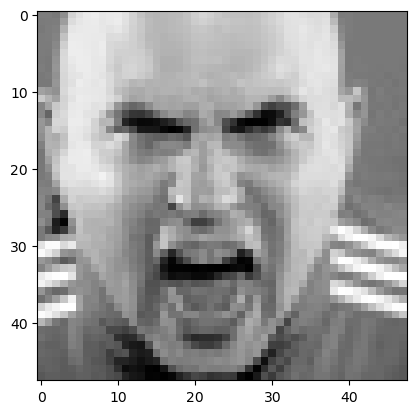

In [ ]:
# Loading image, predicting, and displaying the image
image_path = 'images/train/angry/22.jpg'
print("Original image is angry")
img = ef(image_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()

# Code for Real-Time Detection


In [ ]:
# Importing necessary libraries for realtime prediction
import cv2
import numpy as np
from tensorflow import keras
model = keras.models.load_model("emotion-detection.h5")
# Loading Haar cascade for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Defining a function to extract features from an image
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Open webcam
webcam = cv2.VideoCapture(0)

# Defining dictionary for mapping numerical labels to emotions
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

# Continuous looping for capturing and processing webcam frames
while True:
    # Reading frame from webcam
    i, im = webcam.read()
    # Converting frame to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    # Detecting faces in the grayscale frame
    faces = face_cascade.detectMultiScale(im, 1.3, 5)
    try:
        # Iterating over detected faces
        for (p, q, r, s) in faces:
            # Croping face region from the grayscale frame
            image = gray[q:q+s, p:p+r]
            # Drawing rectangle around the detected face
            cv2.rectangle(im, (p, q), (p+r, q+s), (255, 0, 0), 2)
            # Resize the cropped face region to match model input size
            image = cv2.resize(image, (48, 48))
            # Extracting features from the resized face image
            img = extract_features(image)
            # Making prediction using the loaded model
            pred = model.predict(img)
            # Getting the predicted emotion label
            prediction_label = labels[pred.argmax()]
            # Displaying the predicted emotion label on the frame
            cv2.putText(im, '%s' %(prediction_label), (p-10, q-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))
        # Displaying the frame with predicted emotion labels
        cv2.imshow("Output", im)
        # Waitting for key press and close the window if 'Esc' key is pressed
        cv2.waitKey(27)
    except cv2.error:
        pass  # Skip processing if an error occurs (e.g., no face detected)
